In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as stats
%matplotlib inline

In [69]:
volatility_df = pd.read_csv('../../data/03_processed/volatility_gas_ASTM.csv')

In [70]:
volatility_df['DateSampled'] = pd.to_datetime(volatility_df.DateSampled).apply(lambda x: x.date())
volatility_df = volatility_df.set_index(volatility_df.DateSampled)
print(type(volatility_df.index[0]))
volatility_df.head()

<class 'datetime.date'>


,Unnamed: 0,Sample,Prod,DateSampled,Grade,Supplier,FacilityName,SiteAddress,Test,Units,...,TN_retailers_seasons,TN_distributor_seasons,vapor_liquid_minC_retail,distillation_50_minC _retail,distillation_50_maxC_retail,vapor_pressure_maxC_retail,vapor_liquid_minC_dist,distillation_50_minC_dist,distillation_50_maxC_dist,vapor_pressure_maxC_dist
DateSampled,,,,,,,,,,,,,,,,,,,,,
2015-11-23,0,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Distillation 50%,Deg. C,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-23,1,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor Pressure,kPa,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-23,2,61916134,Gasoline,2015-11-23,Mid Grade Unleaded,Marathon Petroleum Lp,Circle K #2723609,"198 Haywood Ln \r\nnashville, Tn 37211",Vapor-Liquid Ratio,Deg. C,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-24,3,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Distillation 50%,Deg. C,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0
2015-11-24,4,61916135,Gasoline,2015-11-24,Regular Unleaded,NaN,Tiger Market #214,"2001 8th Ave S \r\nnashville, Tn 37204",Vapor Pressure,kPa,...,C-3/D-4,C-3/D-4,42.0,77.0,116.0,93.0,42.0,77.0,116.0,93.0


In [71]:
volatility_df.columns

Index(['Unnamed: 0', 'Sample', 'Prod', 'DateSampled', 'Grade', 'Supplier',
       'FacilityName', 'SiteAddress', 'Test', 'Units', 'Method', 'Result',
       'MinResult', 'MaxResult', 'Compliance', 'datesampled_month',
       'datesampled_day', 'Date', 'TN_retailers_seasons',
       'TN_distributor_seasons', 'vapor_liquid_minC_retail',
       'distillation_50_minC _retail', 'distillation_50_maxC_retail',
       'vapor_pressure_maxC_retail', 'vapor_liquid_minC_dist',
       'distillation_50_minC_dist', 'distillation_50_maxC_dist',
       'vapor_pressure_maxC_dist'],
      dtype='object')

In [72]:
# Make data frames for each test to compare seasonality with temperature results of test
distillation_50_df = volatility_df[volatility_df.Test == 'Distillation 50%']
distillation_50_df.rename(columns={"Result": "Result_deg_C"}, inplace =True)

vapor_liquid_df = volatility_df[volatility_df.Test == 'Vapor-Liquid Ratio']
vapor_liquid_df.rename(columns={"Result": "Result_deg_C"}, inplace =True)

vapor_pressure_df = volatility_df[volatility_df.Test == 'Vapor Pressure']
vapor_pressure_df.rename(columns={"Result": "Result_deg_C"}, inplace =True)

/Users/Kate/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [74]:
distillation_50_df['Result_deg_C'] = distillation_50_df.Result_deg_C.replace(' ', np.nan)

/Users/Kate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
distillation_50_df['Result_deg_C'] = distillation_50_df.Result_deg_C.replace('86..7', '86.7')

/Users/Kate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
distillation_50_df['Result_deg_C'] = distillation_50_df.Result_deg_C.replace('70.3.', '70.3')

/Users/Kate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
distillation_50_df.Result_deg_C.value_counts()

67.3     291
67.5     265
67.1     261
67.4     255
68.1     245
67.8     239
67.9     234
67.7     230
67.2     226
68.4     223
67.6     221
68.2     218
67       208
68.3     208
68.5     186
68       184
66.8     177
68.7     172
66.9     164
68.9     162
66.7     158
68.6     158
68.8     152
69.1     148
69.2     147
66.5     146
69       145
69.3     137
66.6     132
69.4     122
        ... 
64.9       3
110.3      3
112.9      3
115.2      3
113.4      3
114.7      2
113.9      2
113.7      2
112.8      2
114.6      2
115.3      1
39.8       1
114.5      1
117.7      1
118.9      1
64.8       1
64.4       1
148.8      1
57.1       1
113.6      1
117.2      1
115.7      1
156.4      1
118.3      1
59.3       1
116        1
68.0       1
115.1      1
113.8      1
247.1      1
Name: Result_deg_C, Length: 516, dtype: int64

In [98]:
distillation_50_df.Result_deg_C.isna().sum()

48

In [99]:
distillation_50_df.Result_deg_C.astype('float')

DateSampled
2015-11-23     73.3
2015-11-24     67.4
2015-11-24     69.2
2015-11-24     67.7
2015-12-02     90.5
2015-12-02     67.2
2015-12-02     68.8
2015-12-07     68.8
2015-12-07     72.7
2015-12-07     67.4
2015-12-14     67.3
2015-12-15     77.5
2015-12-15     67.3
2016-01-05     70.2
2016-03-07     71.7
2016-03-08     67.7
2016-03-08     82.9
2016-03-28     91.4
2015-07-31     77.7
2015-09-17    108.5
2015-09-17     72.0
2015-09-17     66.4
2015-09-24     72.9
2015-10-08     84.6
2015-10-08     67.9
2015-10-08     70.4
2015-10-26     71.5
2015-10-26     68.4
2015-10-26     71.8
2015-11-05     83.4
              ...  
2018-04-24     72.1
2018-04-24     88.2
2018-04-26     70.6
2018-04-26     68.1
2018-04-27    100.5
2018-04-27     74.8
2018-05-03     68.5
2018-05-03    105.9
2018-05-04     78.5
2018-05-04     76.6
2018-05-07     67.0
2018-05-07     98.8
2018-05-10     92.9
2018-05-10    104.3
2018-05-11     67.2
2018-05-11     99.2
2018-05-14     70.3
2018-05-14     88.0
2018-05-

TypeError: unsupported operand type(s) for -: 'str' and 'str'

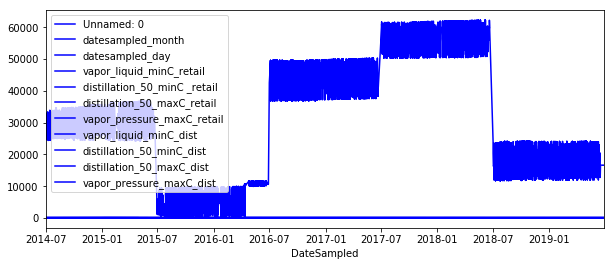

In [100]:
# Import the check_stationarity function from previous lab
def stationarity_check(TS, col_name):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS[col_name].rolling(window = 8, center = False).mean()
    rolstd = TS[col_name].rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS[col_name]) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS[col_name], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

# Import passengers.csv and set it as a time-series object. Plot the TS
distillation_50_df.plot(figsize=(10,4), color="blue");
stationarity_check(distillation_50_df, 'Result_deg_C')

In [21]:
ax = distillation_50_df.Result_deg_C.plot
plt.show()

In [22]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(distillation_50_df.Result_deg_C)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''